In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.helpers import melt_df

msd = pd.read_csv('./output/knn_methods_exp/ml-latest-small_msd.csv')
cos = pd.read_csv('./output/knn_methods_exp/ml-latest-small_cos.csv')
pcc = pd.read_csv('./output/knn_methods_exp/ml-latest-small_pearson.csv')
pccb = pd.read_csv('./output/knn_methods_exp/ml-latest-small_pearsonb.csv')

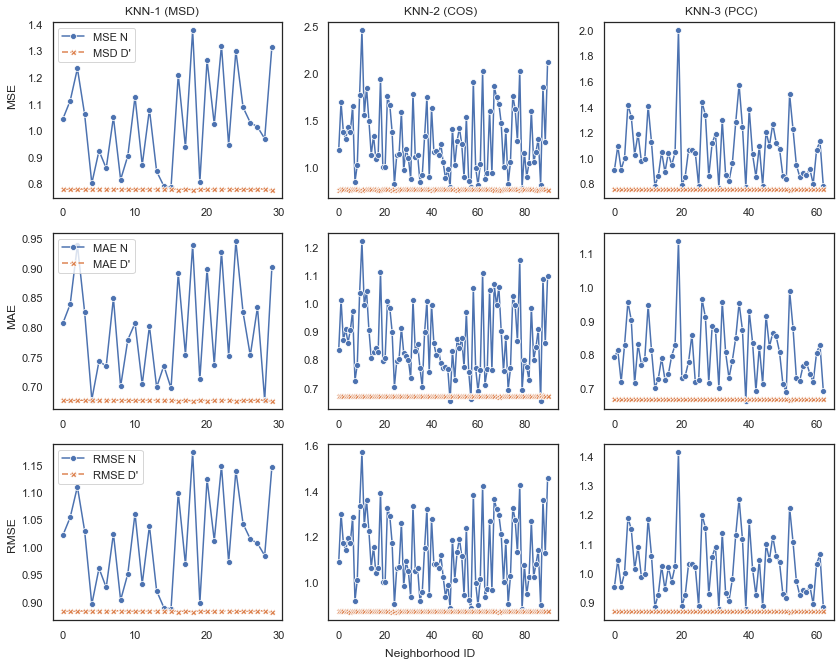

In [14]:
df_msd_mse = melt_df(msd, ['mse_nbhd','mse_equiv'])
df_msd_mae = melt_df(msd, ['mae_nbhd','mae_equiv'])
df_msd_rmse = melt_df(msd, ['rmse_nbhd','rmse_equiv'])
df_cos_mse = melt_df(cos, ['mse_nbhd','mse_equiv'])
df_cos_mae = melt_df(cos, ['mae_nbhd','mae_equiv'])
df_cos_rmse = melt_df(cos, ['rmse_nbhd','rmse_equiv'])
df_pcc_mse = melt_df(pcc, ['mse_nbhd','mse_equiv'])
df_pcc_mae = melt_df(pcc, ['mae_nbhd','mae_equiv'])
df_pcc_rmse = melt_df(pcc, ['rmse_nbhd','rmse_equiv'])

sns.set_theme(style="white") # white, dark, whitegrid, darkgrid, ticks
fig, ax =plt.subplots(3,3, figsize=(14, 11))
sns.lineplot(x=df_msd_mse.Index, y="Value", hue="Variable", data=df_msd_mse, ax=ax[0,0], markers=True, style="Variable")
sns.lineplot(x=df_msd_mae.Index, y="Value", hue="Variable", data=df_msd_mae, ax=ax[1,0], markers=True, style="Variable")
sns.lineplot(x=df_msd_rmse.Index, y="Value", hue="Variable", data=df_msd_rmse, ax=ax[2,0], markers=True, style="Variable")
sns.lineplot(x=df_cos_mse.Index, y="Value", hue="Variable", data=df_cos_mse, ax=ax[0,1], markers=True, style="Variable")
sns.lineplot(x=df_cos_mae.Index, y="Value", hue="Variable", data=df_cos_mae, ax=ax[1,1], markers=True, style="Variable")
sns.lineplot(x=df_cos_rmse.Index, y="Value", hue="Variable", data=df_cos_rmse, ax=ax[2,1], markers=True, style="Variable")
sns.lineplot(x=df_pcc_mse.Index, y="Value", hue="Variable", data=df_pcc_mse, ax=ax[0,2], markers=True, style="Variable")
sns.lineplot(x=df_pcc_mae.Index, y="Value", hue="Variable", data=df_pcc_mae, ax=ax[1,2], markers=True, style="Variable")
sns.lineplot(x=df_pcc_rmse.Index, y="Value", hue="Variable", data=df_pcc_rmse, ax=ax[2,2], markers=True, style="Variable")

fig.text(0.5, 0.08, 'Neighborhood ID', ha='center')
fig.text(0.2337, 0.89, 'KNN-1 (MSD)', ha='center')
fig.text(0.51, 0.89, 'KNN-2 (COS)', ha='center')
fig.text(0.788, 0.89, 'KNN-3 (PCC)', ha='center')
fig.text(0.08, 0.2337, 'RMSE', va='center', rotation='vertical')
fig.text(0.08, 0.51, 'MAE', va='center', rotation='vertical')
fig.text(0.08, 0.788, 'MSE', va='center', rotation='vertical')

# Legend labels
ax[0,0].legend(labels=['MSE N', 'MSD D\''])
ax[1,0].legend(labels=['MAE N', 'MAE D\''])
ax[2,0].legend(labels=['RMSE N', 'RMSE D\''])

for i in range(0, 3):
    for j in range(0, 3):
        # remove all x and y labels
        ax[i,j].set(xlabel=None)
        ax[i,j].set(ylabel=None)

        # only keep legend for first row
        if j == 0:
            continue
        ax[i,j].get_legend().remove()

plt.savefig('./output/knn_methods_exp/knn_methods_ml_latest_small.png', dpi=800, bbox_inches='tight')

In [11]:
ml_latest_small = {
    'Type': ['KNN-1 (MSD)', 'KNN-2 (COS)', 'KNN-3 (PCC)', 'KNN-4 (PCCb)'],
    'perc_critical': [4.92, 14.92, 10.33, 1.15]
}
ml_1m = {
    'Type': ['KNN-1 (MSD)', 'KNN-2 (COS)', 'KNN-3 (PCC)', 'KNN-4 (PCCb)'],
    'perc_critical': [12.85, 15.7, 12.24, 1.47]
}
ml_latest = {
    'Type': ['KNN-1 (MSD)', 'KNN-2 (COS)', 'KNN-3 (PCC)', 'KNN-4 (PCCb)'],
    'perc_critical': [8.91, 6.27, 9.84, 3.19]
}
personality = {
    'Type': ['KNN-1 (MSD)', 'KNN-2 (COS)', 'KNN-3 (PCC)', 'KNN-4 (PCCb)'],
    'perc_critical': [0.38, 4.89, 2.75, 1.76]
}


ml_latest_small_df = pd.DataFrame(data=ml_latest_small)
ml_1m_df = pd.DataFrame(data=ml_1m)
ml_latest_df = pd.DataFrame(data=ml_latest)
personality_df = pd.DataFrame(data=personality)

ml_latest_small_df['dataset'] = 'ml-latest-small'
ml_1m_df['dataset'] = 'ml-1m'
ml_latest_df['dataset'] = 'ml-latest'
personality_df['dataset'] = 'personality'

final_df = ml_latest_small_df.append(ml_1m_df)
final_df = final_df.append(ml_latest_df)
final_df = final_df.append(personality_df)

C:\Users\Wissam Al Jurdi\AppData\Local\Temp\ipykernel_26552\2055107264.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = ml_latest_small_df.append(ml_1m_df)
C:\Users\Wissam Al Jurdi\AppData\Local\Temp\ipykernel_26552\2055107264.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(ml_latest_df)
C:\Users\Wissam Al Jurdi\AppData\Local\Temp\ipykernel_26552\2055107264.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(personality_df)


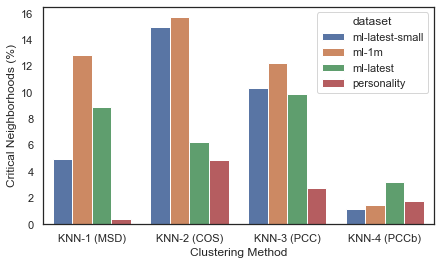

In [13]:
fig, ax =plt.subplots(figsize=(7, 4))
sns.set_theme(style="white") # white, dark, whitegrid, darkgrid, ticks

sns.barplot(x="Type", y="perc_critical", hue="dataset", data=final_df)

ax.set_xlabel("Clustering Method")
ax.set_ylabel("Critical Neighborhoods (%)")

plt.savefig('./output/knn_methods_exp/all_knn_critical_nbhds.png', dpi=800, bbox_inches='tight')